<a href="https://colab.research.google.com/github/armanalam6342/Laptop-price-pridector/blob/main/Laptop_price_predict_self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df=pd.read_csv("/content/drive/MyDrive/housing data/laptop_data.csv")

In [95]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv("/content/drive/MyDrive/housing data/laptop_data.csv")

In [98]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


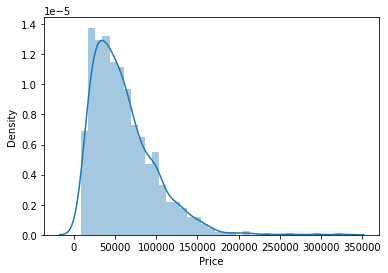

In [99]:
sns.distplot(df.Price) #here we see our dependable varible is skewed 

In [100]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

## we remove GB and Kg From Ram and weight columns

In [101]:
df['Ram']=df['Ram'].str.replace('GB','').astype(int)
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [102]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


## now we do some feature enginearing in Screen resolution 
In Screen resolution column many features are hidden like Ips panel and Screen resolution

In [103]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [104]:
df['Ips']=df.ScreenResolution.apply(lambda x:1  if 'IPS' in x else 0)

In [105]:
df.Ips.value_counts()

0    938
1    365
Name: Ips, dtype: int64

In [106]:
df['Touchscreen']=df.ScreenResolution.apply(lambda x:1  if 'Touchscreen' in x else 0)

In [107]:
df.Touchscreen.value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

In [108]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0


In [109]:
Try = df.ScreenResolution.str.split('x',n=1,expand=True)

In [110]:
Try

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [111]:
Try['x_res'] = Try[0].str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(int)
Try['y_res'] = Try[1].astype(int)

In [112]:
Try.head()

,0,1,x_res,y_res
0,IPS Panel Retina Display 2560,1600,2560,1600
1,1440,900,1440,900
2,Full HD 1920,1080,1920,1080
3,IPS Panel Retina Display 2880,1800,2880,1800
4,IPS Panel Retina Display 2560,1600,2560,1600


In [113]:
df['PPI']=round((((Try['x_res']**2)+(Try['y_res']**2))**0.5)/df['Inches'],2)

In [114]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.53
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.98


In [115]:
df.drop(['ScreenResolution'],axis=1,inplace=True)

In [116]:
df.drop(['Inches'],axis=1,inplace=True)

In [117]:
# df['Cpu'].str.split(' ').apply(lambda x : ' '.join(x) x[:3])

In [118]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [119]:
df['Cpu']=df['Cpu'].apply(lambda x:' '.join(x.split()[:3]))

In [120]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,PPI
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.98
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.53
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.98


In [121]:
df['Cpu'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series 9410            3
AMD A10-Series A10-9620P      2
AMD E-Series 7110             2
Intel Xeon E3-1505M           2
AMD A10-Series 9600P          2
AMD E-Series E2-9000e         2
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
Samsung Cortex A72&A53        1
AMD A6-Series 7310            1
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD A12-Series 9700P          1
AMD E-Se

In [122]:
df.shape

(1303, 12)

In [123]:
(df[df["Cpu"]=='Samsung Cortex A72&A53'])

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,PPI
1191,Samsung,2 in 1 Convertible,Samsung Cortex A72&A53,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.51


In [124]:
df.drop([1191],axis=0,inplace=True)

In [125]:
def cpu(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other intel processor'
    else:
      return 'AMD Processor'


In [126]:
df['Cpu']=df['Cpu'].apply(cpu)

In [127]:
df['Cpu'].value_counts().sum()

1302

In [128]:
df.duplicated().sum()

29

In [129]:
df.drop_duplicates(inplace=True)

In [130]:
df['Cpu'].value_counts()

Intel Core i7            515
Intel Core i5            423
Other intel processor    141
Intel Core i3            134
AMD Processor             60
Name: Cpu, dtype: int64

In [131]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,PPI
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.98
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.53
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.98


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1273
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Cpu          1273 non-null   object 
 3   Ram          1273 non-null   int64  
 4   Memory       1273 non-null   object 
 5   Gpu          1273 non-null   object 
 6   OpSys        1273 non-null   object 
 7   Weight       1273 non-null   float64
 8   Price        1273 non-null   float64
 9   Ips          1273 non-null   int64  
 10  Touchscreen  1273 non-null   int64  
 11  PPI          1273 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 129.3+ KB


In [133]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
8GB SSD                            1
6

In [134]:
df.Memory=df.Memory.str.replace('GB','') #remove GB
df.Memory=df.Memory.str.replace('.0TB','000') #Remove .0TB to 000
df.Memory=df.Memory.str.replace('TB','000') #Remove TB to 000

In [135]:
df.Memory.value_counts()

256 SSD                         412
1000 HDD                        216
500 HDD                         123
512 SSD                         114
128 SSD +  1000 HDD              94
128 SSD                          74
256 SSD +  1000 HDD              73
32 Flash Storage                 35
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         14
64 Flash Storage                 13
256 SSD +  2000 HDD              10
256 Flash Storage                 8
1000 Hybrid                       7
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
256 SSD +  500 HDD                2
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
512 SSD +  1000 Hybrid            1
32 HDD                      

In [136]:
# def memory(text):
#   if text == 'SSD'

In [137]:
Test =df.Memory.str.split('+' , n=1, expand=True)

In [138]:
Test['tempssd'] = Test[0].apply(lambda x : 1 if 'SSD' in x else 0)

In [139]:
Test['temphdd'] = Test[0].apply(lambda x : 1 if 'HDD' in x else 0)

In [140]:
Test['temphybrid'] = Test[0].apply(lambda x : 1 if 'Hybrid' in x else 0)

In [141]:
Test['tempFlashStorage'] = Test[0].apply(lambda x : 1 if 'Flash Storage' in x else 0)

In [142]:
Test.fillna('0',inplace=True)

In [143]:
Test['tempssd1'] = Test[1].apply(lambda x : 1 if 'SSD' in x else 0)
Test['temphdd1'] = Test[1].apply(lambda x : 1 if 'HDD' in x else 0)
Test['temphybrid1'] = Test[1].apply(lambda x : 1 if 'Hybrid' in x else 0)
Test['tempFlashStorage1'] = Test[1].apply(lambda x : 1 if 'Flash Storage' in x else 0)

In [144]:
Test.sample(5)

,0,1,tempssd,temphdd,temphybrid,tempFlashStorage,tempssd1,temphdd1,temphybrid1,tempFlashStorage1
903,256 Flash Storage,0,0,0,0,1,0,0,0,0
155,256 SSD,0,1,0,0,0,0,0,0,0
206,1000 HDD,0,0,1,0,0,0,0,0,0
346,32 Flash Storage,0,0,0,0,1,0,0,0,0
734,256 SSD,0,1,0,0,0,0,0,0,0


In [145]:
Test[0]=Test[0].str.replace(r'\D','')
Test[1]=Test[1].str.replace(r'\D','')

In [146]:
Test.sample(5)

,0,1,tempssd,temphdd,temphybrid,tempFlashStorage,tempssd1,temphdd1,temphybrid1,tempFlashStorage1
609,128,0,0,0,0,1,0,0,0,0
1229,128,1000,1,0,0,0,0,1,0,0
1147,256,0,1,0,0,0,0,0,0,0
430,16,0,0,0,0,1,0,0,0,0
1230,512,0,1,0,0,0,0,0,0,0


In [147]:
Test[0] = Test[0].astype(int)
Test[1] = Test[1].astype(int)

In [148]:
df['SSD']=Test[0]*Test['tempssd']+Test[1]*Test['tempssd1']
df['HHD']=Test[0]*Test['temphdd']+Test[1]*Test['temphdd1']
df['Hybrid']=Test[0]*Test['temphybrid']+Test[1]*Test['temphybrid1']
df['FlashStorage']=Test[0]*Test['tempFlashStorage']+Test[1]*Test['tempFlashStorage1']

In [149]:
df.corr()['Price']

Ram             0.739996
Weight          0.211667
Price           1.000000
Ips             0.251514
Touchscreen     0.190382
PPI             0.345142
SSD             0.669808
HHD            -0.098481
Hybrid          0.022490
FlashStorage   -0.036712
Name: Price, dtype: float64

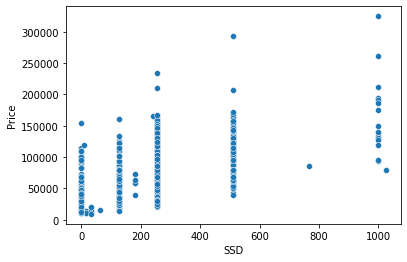

In [150]:
sns.scatterplot(x=df.SSD, y=df.Price)

In [151]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,PPI,SSD,HHD,Hybrid,FlashStorage
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.98,128,0,0,0
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,0,0,0,128
2,HP,Notebook,Intel Core i5,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,256,0,0,0
3,Apple,Ultrabook,Intel Core i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.53,512,0,0,0
4,Apple,Ultrabook,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.98,256,0,0,0


In [152]:
df.drop(columns='Memory',inplace=True)

In [153]:
df.Gpu.value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R7 M365X          1
AMD Radeon RX 560            1
Nvidia GeForce 940M          1
Nvidia GeForce 960M          1
Nvidia Quadro M3000M         1
Name: Gpu, Length: 109, dtype: int64

In [154]:
df.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [155]:
def gpu(text):
  if 'Nvidia' in text:
    return 'Nvidia'
  elif "AMD" in text:
    return 'AMD'
  elif "Intel" in text:
    return 'Intel'

In [156]:
df['Gpu'] = df['Gpu'].apply(gpu)

In [157]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Ips,Touchscreen,PPI,SSD,HHD,Hybrid,FlashStorage
0,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,71378.6832,1,0,226.98,128,0,0,0
1,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.34,47895.5232,0,0,127.68,0,0,0,128
2,HP,Notebook,Intel Core i5,8,Intel,No OS,1.86,30636.0000,0,0,141.21,256,0,0,0
3,Apple,Ultrabook,Intel Core i7,16,AMD,macOS,1.83,135195.3360,1,0,220.53,512,0,0,0
4,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,96095.8080,1,0,226.98,256,0,0,0


In [158]:
# df.drop(columns='gpu1',inplace=True)

In [159]:
# df.gpu1.value_counts()

In [160]:
df.OpSys.value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

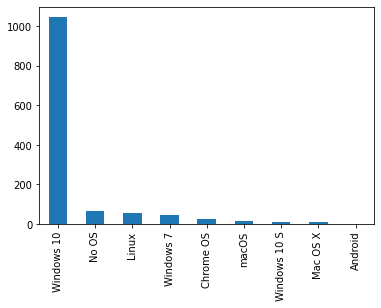

In [161]:
df.OpSys.value_counts().plot(kind='bar')

In [162]:
def os(text):
  if 'Windows' in text:
    return 'Windows'
  elif 'macOS' in text:
    return 'mac'
  else:
    return 'other'

In [163]:
df['os']=df['OpSys'].apply(os)

In [164]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Ips,Touchscreen,PPI,SSD,HHD,Hybrid,FlashStorage,os
0,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,71378.6832,1,0,226.98,128,0,0,0,mac
1,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.34,47895.5232,0,0,127.68,0,0,0,128,mac
2,HP,Notebook,Intel Core i5,8,Intel,No OS,1.86,30636.0000,0,0,141.21,256,0,0,0,other
3,Apple,Ultrabook,Intel Core i7,16,AMD,macOS,1.83,135195.3360,1,0,220.53,512,0,0,0,mac
4,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,96095.8080,1,0,226.98,256,0,0,0,mac


In [165]:
df.corr()['Price']

Ram             0.739996
Weight          0.211667
Price           1.000000
Ips             0.251514
Touchscreen     0.190382
PPI             0.345142
SSD             0.669808
HHD            -0.098481
Hybrid          0.022490
FlashStorage   -0.036712
Name: Price, dtype: float64

In [166]:
df.drop(columns=['OpSys','Hybrid','FlashStorage'],inplace=True)

In [167]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,Weight,Price,Ips,Touchscreen,PPI,SSD,HHD,os
0,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,71378.6832,1,0,226.98,128,0,mac
1,Apple,Ultrabook,Intel Core i5,8,Intel,1.34,47895.5232,0,0,127.68,0,0,mac
2,HP,Notebook,Intel Core i5,8,Intel,1.86,30636.0000,0,0,141.21,256,0,other
3,Apple,Ultrabook,Intel Core i7,16,AMD,1.83,135195.3360,1,0,220.53,512,0,mac
4,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,96095.8080,1,0,226.98,256,0,mac


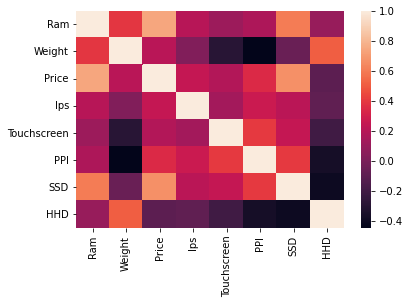

In [168]:
sns.heatmap(df.corr())

In [169]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Ram,Weight,Price,Ips,Touchscreen,PPI,SSD,HHD
Ram,1.000000,0.389134,0.739996,0.202809,0.113316,0.172968,0.599552,0.097340
Weight,0.389134,1.000000,0.211667,0.023966,-0.292288,-0.448843,-0.056985,0.510876
Price,0.739996,0.211667,1.000000,0.251514,0.190382,0.345142,0.669808,-0.098481
Ips,0.202809,0.023966,0.251514,1.000000,0.136973,0.271661,0.215197,-0.090411
Touchscreen,0.113316,-0.292288,0.190382,0.136973,1.000000,0.403958,0.252142,-0.205105
PPI,0.172968,-0.448843,0.345142,0.271661,0.403958,1.000000,0.404096,-0.369260
SSD,0.599552,-0.056985,0.669808,0.215197,0.252142,0.404096,1.000000,-0.400625
HHD,0.097340,0.510876,-0.098481,-0.090411,-0.205105,-0.369260,-0.400625,1.000000
